In [1]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('iris.csv')
    
# It is a good idea to check and make sure the data is loaded as expected.
print(data.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
data.drop('Id', axis=1, inplace=True)

In [4]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()


# List of columns to encode
#columns_to_encode = ['gender', 'city']

columns_to_encode = ['Species']

# Encode the specified columns
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

# Display the DataFrame with the replaced columns
print(data)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]


In [10]:
#Scaling

import pandas as pd
from sklearn.preprocessing import StandardScaler


# Initialize StandardScaler
scaler = StandardScaler()

# Select the specific columns to scale
columns_to_scale = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']

# Fit and transform the selected columns
scaled_columns = scaler.fit_transform(data[columns_to_scale])

# Replace the original columns with the scaled values
data[columns_to_scale] = scaled_columns

# Display the DataFrame with scaled values
print(data)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0        -0.900681      1.032057      -1.341272     -1.312977        0
1        -1.143017     -0.124958      -1.341272     -1.312977        0
2        -1.385353      0.337848      -1.398138     -1.312977        0
3        -1.506521      0.106445      -1.284407     -1.312977        0
4        -1.021849      1.263460      -1.341272     -1.312977        0
..             ...           ...            ...           ...      ...
145       1.038005     -0.124958       0.819624      1.447956        2
146       0.553333     -1.281972       0.705893      0.922064        2
147       0.795669     -0.124958       0.819624      1.053537        2
148       0.432165      0.800654       0.933356      1.447956        2
149       0.068662     -0.124958       0.762759      0.790591        2

[150 rows x 5 columns]


In [11]:
import pandas as pd

# Specify the columns with missing values
columns_with_missing = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']

# Fill missing values with the mean of each column
for col in columns_with_missing:
    data[col].fillna(data[col].mean(), inplace=True)

# Display the DataFrame with filled missing values
print(data)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0        -0.900681      1.032057      -1.341272     -1.312977        0
1        -1.143017     -0.124958      -1.341272     -1.312977        0
2        -1.385353      0.337848      -1.398138     -1.312977        0
3        -1.506521      0.106445      -1.284407     -1.312977        0
4        -1.021849      1.263460      -1.341272     -1.312977        0
..             ...           ...            ...           ...      ...
145       1.038005     -0.124958       0.819624      1.447956        2
146       0.553333     -1.281972       0.705893      0.922064        2
147       0.795669     -0.124958       0.819624      1.053537        2
148       0.432165      0.800654       0.933356      1.447956        2
149       0.068662     -0.124958       0.762759      0.790591        2

[150 rows x 5 columns]


In [13]:
# Pandas ".iloc" expects row_indexer, column_indexer  
X = data.iloc[:,:-1].values

# Now let's tell the dataframe which column we want for the target/labels.  
y = data['Species']

In [14]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(X_train)  
print(y_train)

[[-1.50652052e+00  1.26346019e+00 -1.56873522e+00 -1.31297673e+00]
 [-1.73673948e-01  3.11468391e+00 -1.28440670e+00 -1.05003079e+00]
 [ 1.03800476e+00  1.06445364e-01  3.64698715e-01  2.64698913e-01]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.74885626e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [ 5.53333275e-01 -1.28197243e+00  7.05892939e-01  9.22063763e-01]
 [ 6.74501145e-01  3.37848329e-01  4.21564419e-01  3.96171883e-01]
 [-7.79513300e-01  1.03205722e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-7.79513300e-01  2.42047502e+00 -1.28440670e+00 -1.44444970e+00]
 [-5.25060772e-02 -8.19166497e-01  7.62758643e-01  9.22063763e-01]
 [ 1.89829664e-01  8.00654259e-01  4.21564419e-01  5.27644853e-01]
 [ 1.03800476e+00  1.06445364e-01  5.35295827e-01  3.96171883e-01]
 [-5.37177559e-01  1.95766909e+00 -1.39813811e+00 -1.05003079e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e

In [16]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Support Vector Machine (SVM)
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
print(accuracy_score(SVC_prediction, y_test))
print(classification_report(y_test, SVC_prediction))
print(confusion_matrix(SVC_prediction, y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Multiple Linear Regression(petrol_consumption.csv) :

In [17]:
import pandas as pd
path_to_file = 'petrol_consumption.csv'
df = pd.read_csv(path_to_file)

In [18]:
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [19]:
df.shape

(48, 5)

In [20]:
print(df.describe().round(2).T)

                              count     mean      std      min      25%  \
Petrol_tax                     48.0     7.67     0.95     5.00     7.00   
Average_income                 48.0  4241.83   573.62  3063.00  3739.00   
Paved_Highways                 48.0  5565.42  3491.51   431.00  3110.25   
Population_Driver_licence(%)   48.0     0.57     0.06     0.45     0.53   
Petrol_Consumption             48.0   576.77   111.89   344.00   509.50   

                                  50%      75%       max  
Petrol_tax                       7.50     8.12     10.00  
Average_income                4298.00  4578.75   5342.00  
Paved_Highways                4735.50  7156.00  17782.00  
Population_Driver_licence(%)     0.56     0.60      0.72  
Petrol_Consumption             568.50   632.75    968.00  


In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()


# List of columns to encode
columns_to_encode = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)', 'Petrol_Consumption' ]

#columns_to_encode = ['Species']

# Encode the specified columns
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Display the DataFrame with the replaced columns
print(df)

    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0            7               5               5                             8   
1            7              18               2                            22   
2            7              15               4                            26   
3            4              39               8                             9   
4            5              30               0                            12   
5            8              46               3                            21   
6            5              45              44                             0   
7            5              43               6                            18   
8            5              31              40                             9   
9            3              34              38                            17   
10           5              29              27                            10   
11           4              43          

In [24]:
#Scaling

import pandas as pd
from sklearn.preprocessing import StandardScaler


# Initialize StandardScaler
scaler = StandardScaler()

# Select the specific columns to scale
columns_to_scale = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)', 'Petrol_Consumption' ]

# Fit and transform the selected columns
scaled_columns = scaler.fit_transform(df[columns_to_scale])

# Replace the original columns with the scaled values
df[columns_to_scale] = scaled_columns

# Display the DataFrame with scaled values
print(df)


    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0     1.495262       -1.342009       -1.348358                     -1.032559   
1     1.495262       -0.394709       -1.569753                      0.238283   
2     1.495262       -0.613316       -1.422157                      0.601380   
3    -0.186908        1.135546       -1.126963                     -0.941784   
4     0.373815        0.479723       -1.717350                     -0.669461   
5     2.055985        1.645631       -1.495955                      0.147508   
6     0.373815        1.572762        1.529779                     -1.758754   
7     0.373815        1.427023       -1.274560                     -0.124815   
8     0.373815        0.552592        1.234586                     -0.941784   
9    -0.747631        0.771200        1.086989                     -0.215589   
10    0.373815        0.406853        0.275207                     -0.851010   
11   -0.186908        1.427023        1.

In [25]:
import pandas as pd

# Specify the columns with missing values
columns_with_missing = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)', 'Petrol_Consumption' ]

# Fill missing values with the mean of each column
for col in columns_with_missing:
    df[col].fillna(df[col].mean(), inplace=True)

# Display the DataFrame with filled missing values
print(df)

    Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0     1.495262       -1.342009       -1.348358                     -1.032559   
1     1.495262       -0.394709       -1.569753                      0.238283   
2     1.495262       -0.613316       -1.422157                      0.601380   
3    -0.186908        1.135546       -1.126963                     -0.941784   
4     0.373815        0.479723       -1.717350                     -0.669461   
5     2.055985        1.645631       -1.495955                      0.147508   
6     0.373815        1.572762        1.529779                     -1.758754   
7     0.373815        1.427023       -1.274560                     -0.124815   
8     0.373815        0.552592        1.234586                     -0.941784   
9    -0.747631        0.771200        1.086989                     -0.215589   
10    0.373815        0.406853        0.275207                     -0.851010   
11   -0.186908        1.427023        1.

In [26]:
print(df.describe().round(2).T)

                              count  mean   std   min   25%   50%   75%   max
Petrol_tax                     48.0   0.0  1.01 -2.43 -0.75 -0.19  0.51  2.06
Average_income                 48.0  -0.0  1.01 -1.71 -0.85  0.01  0.86  1.65
Paved_Highways                 48.0   0.0  1.01 -1.72 -0.85  0.02  0.88  1.68
Population_Driver_licence(%)   48.0   0.0  1.01 -1.76 -0.87  0.01  0.81  1.69
Petrol_Consumption             48.0   0.0  1.01 -1.71 -0.82 -0.02  0.86  1.75


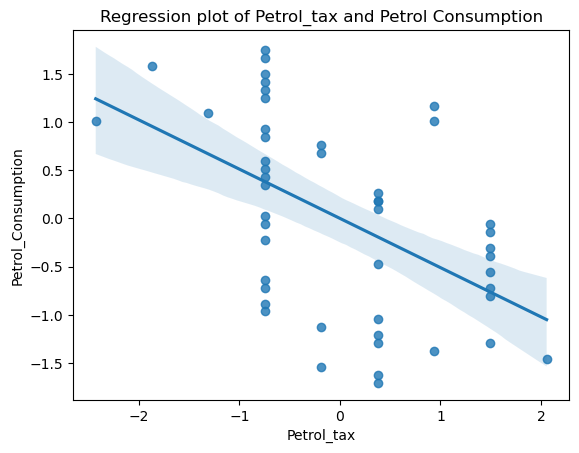

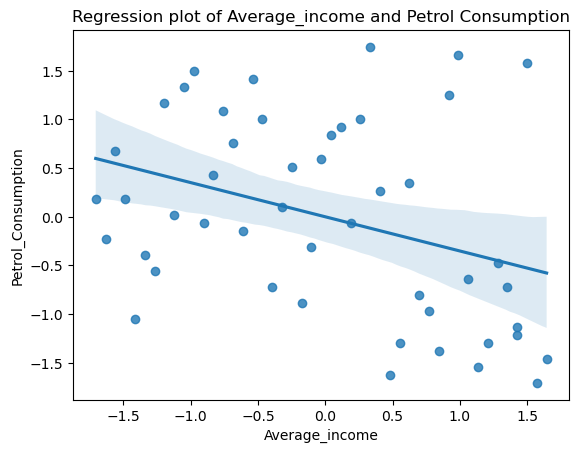

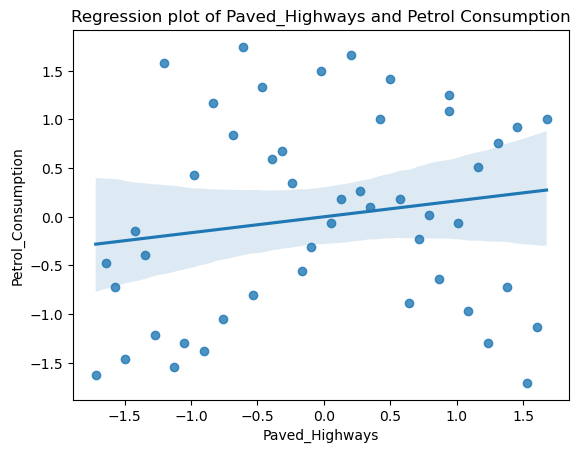

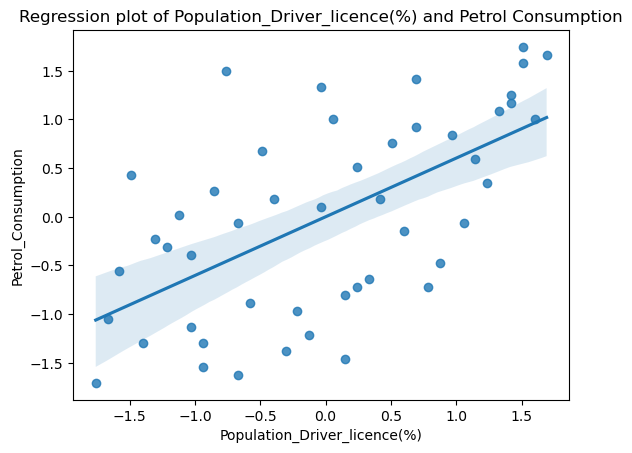

In [27]:
import seaborn as sns 
import matplotlib.pyplot as plt
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

for var in variables:
    #df.plot.scatter(x=var, y='Petrol_Consumption', title='Scatterplot of hours and scores percentages');
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes best-fitting regression line ,which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Regression plot of {var} and Petrol Consumption');

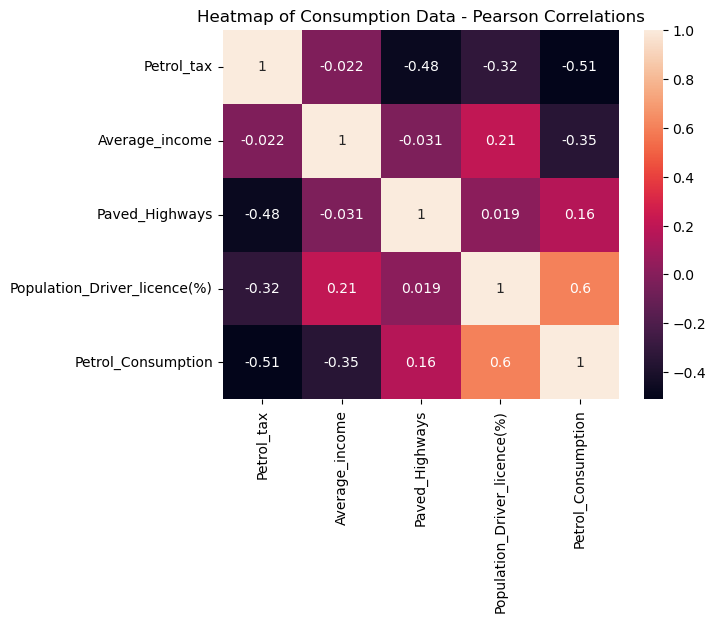

In [28]:
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');

In [29]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [30]:
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [31]:
X.shape

(48, 4)

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
print(regressor.intercept_)
print(regressor.coef_)

0.004842443606318483
[-0.41450079 -0.09563804  0.55058081 -0.39477556]


In [34]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                              Coefficient value
Average_income                        -0.414501
Paved_Highways                        -0.095638
Population_Driver_licence(%)           0.550581
Petrol_tax                            -0.394776


In [35]:
y_pred = regressor.predict(X_test)

In [36]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

      Actual  Predicted
27  0.760292   0.519052
40  0.349323   0.744779
26  0.184936   0.243081
43  0.431517  -0.079913
24 -1.376745  -0.796029
37  1.417841   0.857598
12 -0.637001  -0.042103
19  1.006873   0.368115
4  -1.623326  -0.545925
25 -0.061645  -0.584152


In [37]:
regressor.score(X_test,y_test)

0.6247472565543212

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.52
Mean squared error: 0.33
Root mean squared error: 0.58
